<a href="https://colab.research.google.com/github/AlifyaFebriana/water-quality/blob/main/HSC_A5_Percobaan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os

dir_example = "/content/gdrive/MyDrive/water images/test"

classes = os.listdir(dir_example)
print(classes)

['Clean', 'Dirty']


In [5]:
train_dir = '/content/gdrive/MyDrive/water images/train'
test_dir = '/content/gdrive/MyDrive/water images/test'

Text(0.5, 1.0, 'Clean Water')

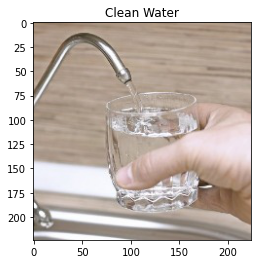

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

cleanImg = Image.open('/content/gdrive/MyDrive/water images/train/Clean/19.jpg')
plt.imshow(cleanImg)
plt.title('Clean Water')

Text(0.5, 1.0, 'Dirty Water')

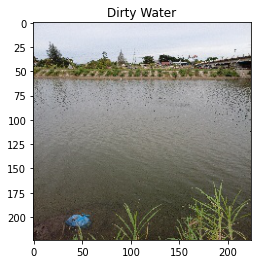

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

dirtyImg = Image.open('/content/gdrive/MyDrive/water images/train/Dirty/23.jpg')
plt.imshow(dirtyImg)
plt.title('Dirty Water')

In [8]:
cleanTrain = len(os.listdir('/content/gdrive/MyDrive/water images/train/Clean'))
dirtyTrain = len(os.listdir('/content/gdrive/MyDrive/water images/train/Dirty'))
cleanTest = len(os.listdir('/content/gdrive/MyDrive/water images/test/Clean'))
dirtyTest = len(os.listdir('/content/gdrive/MyDrive/water images/test/Dirty'))

print('The number of clean images in training is: ', cleanTrain)
print('The number of dirty images in training is: ', dirtyTrain)
print()
print('The number of clean images in testing is: ', cleanTest)
print('The number of dirty images in testing is: ', dirtyTest)

The number of clean images in training is:  53
The number of dirty images in training is:  53

The number of clean images in testing is:  23
The number of dirty images in testing is:  23


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 16)


Found 106 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(
    rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 16)

Found 46 images belonging to 2 classes.


In [46]:
#Printing the training set
labels = (train_generator.class_indices)
print(labels,'\n')

{'Clean': 0, 'Dirty': 1} 



In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(train_generator,
                    epochs = 50,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator),
                    verbose = 1)

Epoch 1/50
7/7 [==============================] - 63s 9s/step - loss: 1.0703 - accuracy: 0.5189 - val_loss: 0.5424 - val_accuracy: 0.8043
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 0.5851 - accuracy: 0.7736 - val_loss: 0.3558 - val_accuracy: 0.8478
Epoch 3/50
7/7 [==============================] - 15s 2s/step - loss: 0.6088 - accuracy: 0.6981 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 14s 2s/step - loss: 0.5525 - accuracy: 0.5566 - val_loss: 0.4615 - val_accuracy: 0.7609
Epoch 5/50
7/7 [==============================] - 14s 2s/step - loss: 0.4698 - accuracy: 0.7736 - val_loss: 0.4074 - val_accuracy: 0.8261
Epoch 6/50
7/7 [==============================] - 14s 2s/step - loss: 0.3779 - accuracy: 0.8491 - val_loss: 0.4216 - val_accuracy: 0.8696
Epoch 7/50
7/7 [==============================] - 14s 2s/step - loss: 0.4215 - accuracy: 0.8491 - val_loss: 0.3877 - val_accuracy: 0.8261
Epoch 8/50
7/7 [==================

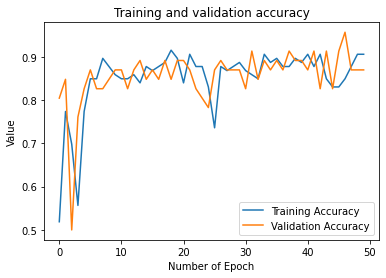

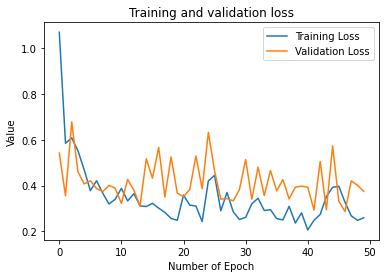

In [16]:
#------------------------------------------------
# Evaluating acc and loss for model
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(history.history['accuracy'], label = 'Training Accuracy' )
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(history.history['loss'], label = 'Training Loss' )
plt.plot(history.history['val_loss'], label = 'Validation Loss' )
plt.title('Training and validation loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

In [19]:
model.save('model-water-quality.h5')

In [28]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter_model.convert()

# Save the model.
with open('model-water-quality.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpw00xp4xx/assets


In [42]:
from keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/water images/test/Dirty/33.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Dirty Water'
else:
  prediction = 'Clean Water'

In [43]:
print(prediction)

Dirty Water
